<a href="https://colab.research.google.com/github/EErasmus/System-Modeling-and-Analysis-Project/blob/master/code/experiment_on_close_price_for_100_features_entire_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aapl.us.txt',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
#plot close price
#plt.figure(figsize=(10,6))
# plt.grid(True)
# plt.xlabel('Year')
# plt.ylabel('Close Prices')
# All months data of 2017 for Close price
#data.tail()
#plt.title('All months data of 2017 for Close price')
#plt.plot(data.loc['2017-01-01':'2017-12-31']['Close'])
#plt.figure()
## Difference of close values for each date
#plt.title('Difference of close values for each date')
#plt.plot(np.diff(data.loc['2017-01-01':'2017-12-31']['Close']))
#plt.figure()
## Histogram for values
#plt.title('Histogram for values of Close for each date')
#plt.hist(np.diff(data.loc['2017-01-01':'2017-12-31']['Close']))
## plt.title('Closing Price')
## plt.show()
#plt.figure(figsize=(10,6))
## plt.grid(True)
## plt.xlabel('Year')
## plt.ylabel('Close Prices')
## All close date in file
#plt.title('All Close prices in file')
#plt.plot(data['Close'])
#plt.figure()
## Difference of Close prices
#plt.title('Difference of Close prices in file')
#plt.plot(np.diff(data['Close']))
#plt.figure()
## Histogram for whole data
#plt.title('Histogram for whole Close prices in file')
#plt.hist(np.diff(data['Close']))
#plt.figure()
#df_close = data['Close']
#df_close.plot(style='k.')
#plt.title('Scatter plot of closing price')
#plt.show()
##data.shape
## train, test = train_test_split(data, test_size=0.33)
#data.head()
df1=data.reset_index()['Close']
#df1
#plt.plot(df1)
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
#print(df1)
training_size=int(len(df1)*0.67)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)
 
 
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
#print(X_train.shape), print(y_train.shape)

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#X_train, X_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if __name__ == '__main__':


In [3]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
86/86 [==============================] - 21s 190ms/step - loss: 4.9943e-05 - val_loss: 6.1574e-04
Epoch 2/100
86/86 [==============================] - 15s 175ms/step - loss: 2.4026e-06 - val_loss: 5.4855e-04
Epoch 3/100
86/86 [==============================] - 15s 174ms/step - loss: 2.4642e-06 - val_loss: 5.0095e-04
Epoch 4/100
86/86 [==============================] - 15s 178ms/step - loss: 1.9460e-06 - val_loss: 5.2041e-04
Epoch 5/100
86/86 [==============================] - 15s 177ms/step - loss: 1.5379e-06 - val_loss: 5.8908e-04
Epoch 6/100
86/86 [==============================] - 15s 177ms/step - loss: 1.7892e-06 - val_loss: 3.7498e-04
Epoch 7/100
86/86 [==============================] - 15s 176ms/step - loss: 1.6721e-06 - val_loss: 6.6945e-04
Epoch 8/100
86/86 [==============================] - 15s 177ms/step - loss: 1.3083e-06 - val_loss: 3.6908e-04
Epoch 9/100
86/86 [==============================] - 15s 177ms/step - loss: 1.5495e-06 - val_loss: 3.3978e-04
Epoch 10/1

In [5]:
import tensorflow as tf
### prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [6]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [7]:
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2.6176253528005353

In [8]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

72.28795156779326

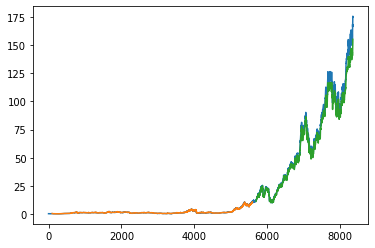

In [25]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
#plt.figure()
plt.plot(testPredictPlot)
#plt.figure()
plt.show()

In [10]:
len(test_data)


2761

In [11]:
x_input=test_data[(len(test_data) - 100):].reshape(1,-1)
x_input.shape

(1, 100)

In [12]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [13]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
  
print(lst_output)

[0.88430345]
101
1 day input [0.82654756 0.82392468 0.8121217  0.8239817  0.81183661 0.81377526
 0.81081026 0.81417439 0.80641978 0.81468757 0.81959122 0.82227112
 0.82346853 0.83492939 0.84217083 0.84507881 0.84798679 0.85334659
 0.84946929 0.84907015 0.85944765 0.86309688 0.86714524 0.85072371
 0.84479371 0.84040323 0.84781573 0.88801427 0.87906226 0.88373783
 0.89742244 0.90460686 0.91019474 0.88111495 0.8934311  0.90688763
 0.91680897 0.91310272 0.89554081 0.89354513 0.89189158 0.9064885
 0.90762888 0.90358052 0.90694465 0.91606772 0.92427849 0.92673031
 0.93043656 0.93072166 0.91954589 0.91857657 0.91487032 0.89993129
 0.91623878 0.91258955 0.90574725 0.89793561 0.90705869 0.90015936
 0.90050148 0.88539139 0.87016726 0.8616714  0.85403082 0.86874178
 0.87495687 0.86954005 0.87432966 0.87256207 0.87632533 0.87068043
 0.88151408 0.88100091 0.88407995 0.88442206 0.88812831 0.88499225
 0.89063715 0.90705869 0.91042282 0.90637446 0.88487821 0.88641773
 0.88596158 0.89126437 0.88733004 

In [14]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [15]:
len(df1)

8364

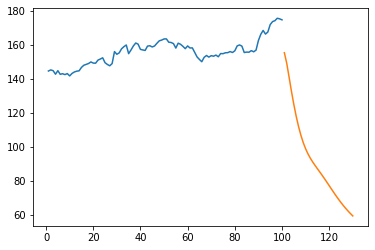

In [20]:
plt.plot(day_new,scaler.inverse_transform(df1[8264:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

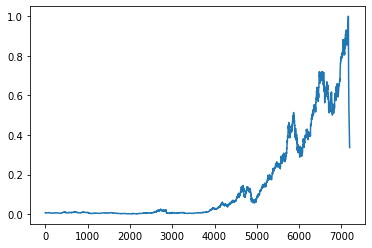

In [17]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [18]:

df3=scaler.inverse_transform(df3).tolist()

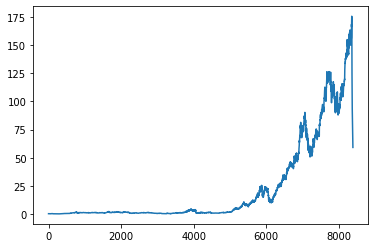

In [24]:
plt.plot(df3)